Data Import and Cleaning:



In [10]:
import pandas as pd
import numpy as np

df=pd.read_csv('Airplane_Crashes_and_Fatalities.csv')

df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [39]:
df_copy = df.copy()

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [40]:
df_copy = df_copy.drop_duplicates()

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [41]:
missing_values = df_copy.isnull().sum()
missing_values

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

#list of things we need to complete the challenge:

#number of crashes (number of observations)
#number of fatalities
#survival rates

#we will drop columns: Time, Ground, Summary, Registration, cn/In, and Route



In [44]:
df_copy = df_copy.drop(columns=['Flight #', 'cn/ln', 'Registration', 'Summary', 'Time', 'Route', 'Ground', 'Aboard Passangers', 'Aboard Crew', 'Fatalities Passangers', 'Fatalities Crew'])

In [47]:
df_copy['Operator'] = df_copy['Operator'].fillna('Unknown')
df_copy['AC Type'] = df_copy['AC Type'].fillna('Unknown')

df_copy.info()
df_copy['Location'] = df_copy['Location'].fillna('Unknown')


df_copy.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        4998 non-null   object 
 1   Location    4994 non-null   object 
 2   Operator    4998 non-null   object 
 3   AC Type     4998 non-null   object 
 4   Aboard      4980 non-null   float64
 5   Fatalities  4990 non-null   float64
dtypes: float64(2), object(4)
memory usage: 234.4+ KB


Date           0
Location       0
Operator       0
AC Type        0
Aboard        18
Fatalities     8
dtype: int64

In [ ]:
#Using mean to fill na values
df_copy['Aboard'] = df_copy['Aboard'].fillna(df_copy['Aboard'].mean())
df_copy['Fatalities'] = df_copy['Fatalities'].fillna(df_copy['Fatalities'].mean())

In [50]:
#We need to create a new column to calculate the survival rate

df_copy['Survival Rate'] = (df_copy['Aboard'] - df_copy['Fatalities']) / df_copy['Aboard']

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4998 non-null   object 
 1   Location       4998 non-null   object 
 2   Operator       4998 non-null   object 
 3   AC Type        4998 non-null   object 
 4   Aboard         4998 non-null   float64
 5   Fatalities     4998 non-null   float64
 6   Survival Rate  4993 non-null   float64
dtypes: float64(3), object(4)
memory usage: 273.5+ KB


In [51]:
#Descriptive Statistics

df_copy.describe()

,Aboard,Fatalities,Survival Rate
count,4998.000000,4998.000000,4993.000000
mean,31.195984,22.373547,0.182758
std,45.452702,35.033663,0.312355
min,0.000000,0.000000,0.000000
25%,7.000000,4.000000,0.000000
50%,16.000000,11.000000,0.000000
75%,35.000000,25.000000,0.250000
max,644.000000,583.000000,1.000000


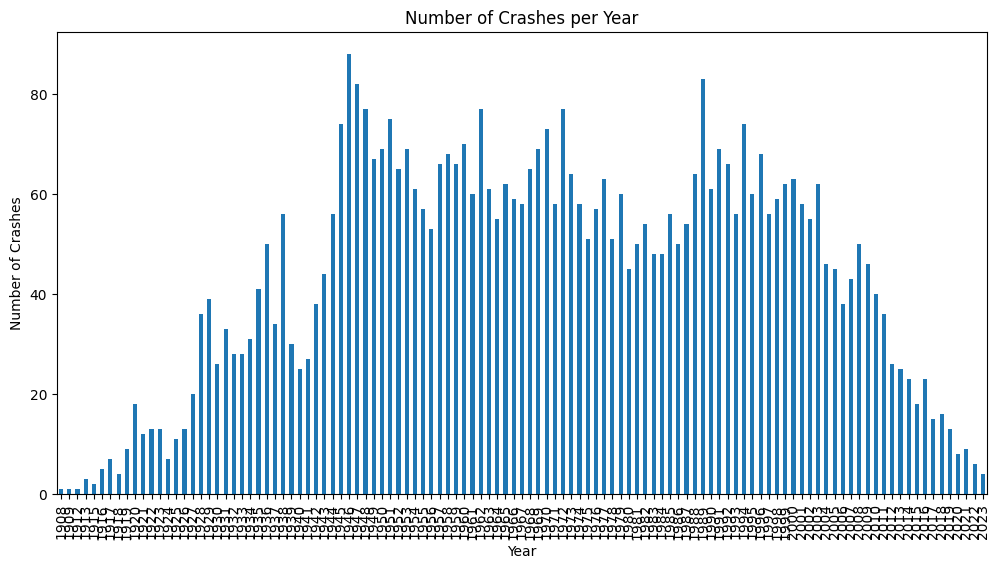

In [53]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format
df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='coerce')

# Extract the year from the 'Date' column
df_copy['Year'] = df_copy['Date'].dt.year

# Group by year and count the number of crashes
crashes_per_year = df_copy.groupby('Year').size()

# Plot the number of crashes per year
plt.figure(figsize=(12, 6))
crashes_per_year.plot(kind='bar')
plt.title('Number of Crashes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()

In [55]:
from scipy import stats

# Calculate key statistics for 'Fatalities'
fatalities_mean = np.mean(df_copy['Fatalities'])
fatalities_median = np.median(df_copy['Fatalities'])
fatalities_std = np.std(df_copy['Fatalities'])

# Calculate key statistics for 'Survival Rate'
survival_rate_mean = np.mean(df_copy['Survival Rate'])
survival_rate_median = np.median(df_copy['Survival Rate'])
survival_rate_std = np.std(df_copy['Survival Rate'])

print("Fatalities - Mean:", fatalities_mean, "Median:", fatalities_median, "Standard Deviation:", fatalities_std)
print("Survival Rate - Mean:", survival_rate_mean, "Median:", survival_rate_median, "Standard Deviation:", survival_rate_std)

Fatalities - Mean: 22.37354709418838 Median: 11.0 Standard Deviation: 35.03015824169028
Survival Rate - Mean: 0.18275780638975686 Median: nan Standard Deviation: 0.312323664063652


In [58]:
from scipy.stats import ttest_ind

# Create a new column for the decade
df_copy['Decade'] = (df_copy['Year'] // 10) * 10

# Group the data by decade and calculate the mean number of fatalities
fatalities_by_decade = df_copy.groupby('Decade')['Fatalities'].mean()

# Select two decades to compare
decade_1 = df_copy[df_copy['Decade'] == 1980]['Fatalities']
decade_2 = df_copy[df_copy['Decade'] == 2000]['Fatalities']

# Perform a t-test to compare the means of the two decades
t_stat, p_value = ttest_ind(decade_1, decade_2)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("The difference in means is statistically significant")
else:
    print("The difference in means is not statistically significant")

T-statistic: 3.0635157641167265
P-value: 0.002242973423060483
The difference in means is statistically significant


C:\Users\User\AppData\Local\Temp\ipykernel_25476\3483097837.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crashes_per_year.index, y=crashes_per_year.values, palette="viridis")


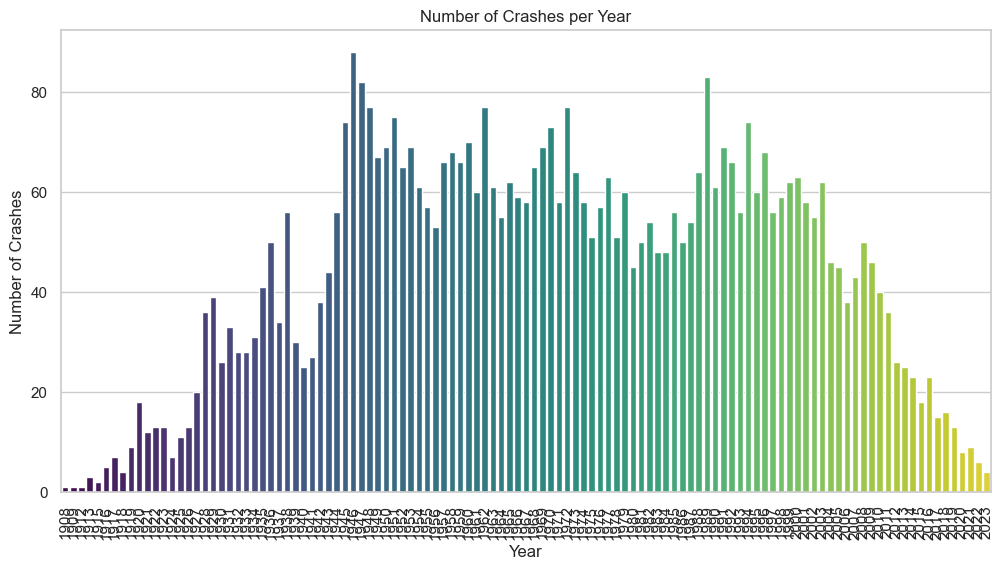

C:\Users\User\AppData\Local\Temp\ipykernel_25476\3483097837.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatalities_by_decade.index, y=fatalities_by_decade.values, palette="magma")


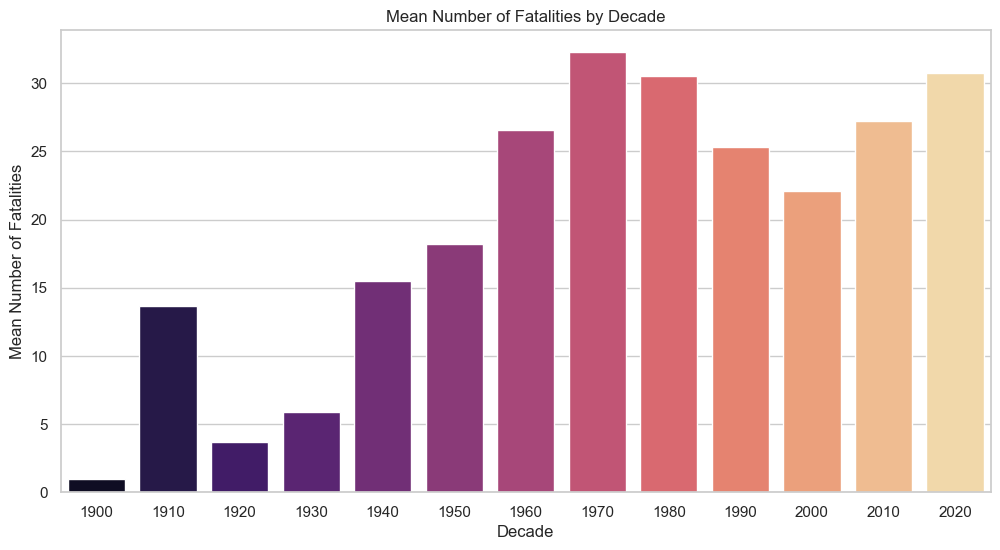

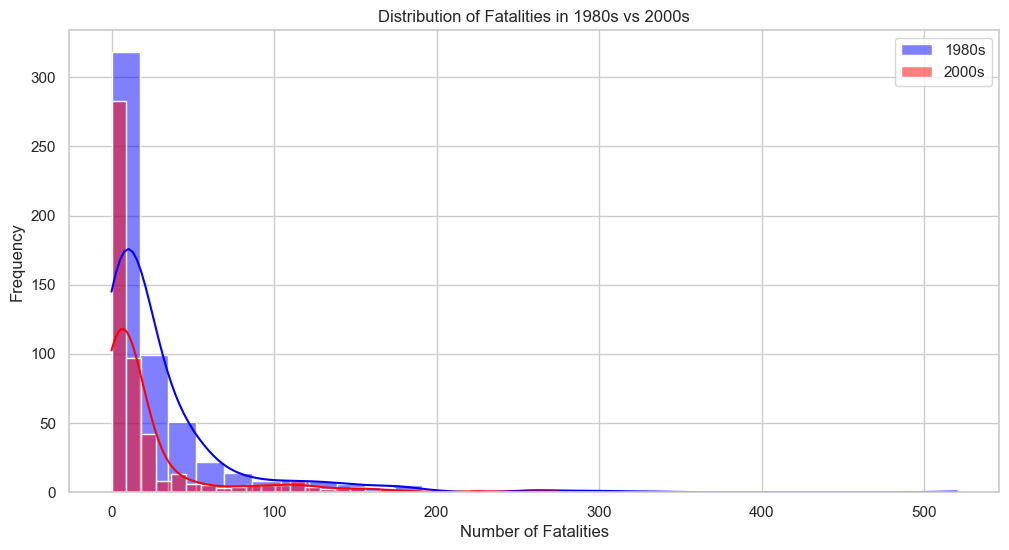

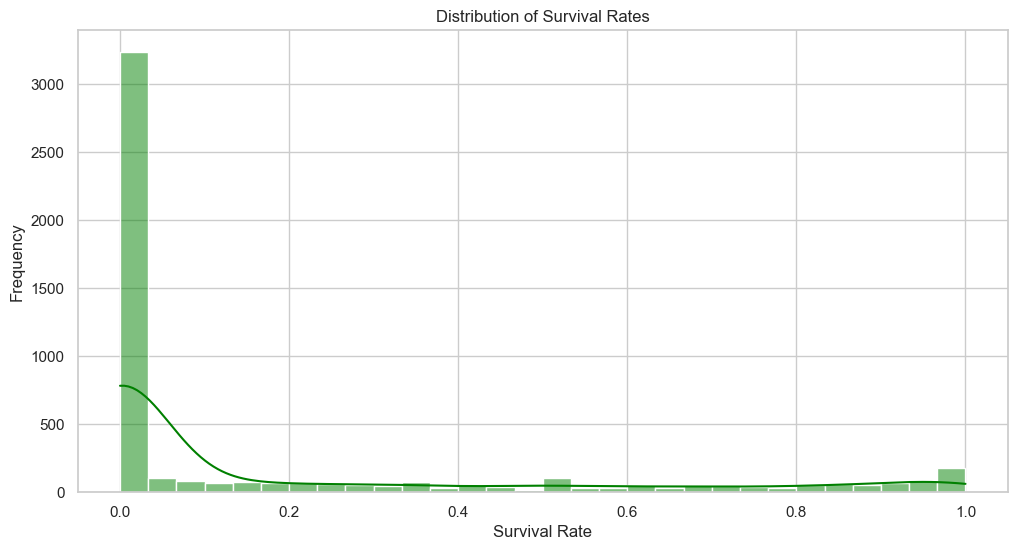

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the number of crashes per year
plt.figure(figsize=(12, 6))
sns.barplot(x=crashes_per_year.index, y=crashes_per_year.values, palette="viridis")
plt.title('Number of Crashes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.show()

# Plot the mean number of fatalities by decade
plt.figure(figsize=(12, 6))
sns.barplot(x=fatalities_by_decade.index, y=fatalities_by_decade.values, palette="magma")
plt.title('Mean Number of Fatalities by Decade')
plt.xlabel('Decade')
plt.ylabel('Mean Number of Fatalities')
plt.show()

# Plot the distribution of fatalities for the two selected decades
plt.figure(figsize=(12, 6))
sns.histplot(decade_1, kde=True, color='blue', label='1980s', bins=30)
sns.histplot(decade_2, kde=True, color='red', label='2000s', bins=30)
plt.title('Distribution of Fatalities in 1980s vs 2000s')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the survival rate distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_copy['Survival Rate'].dropna(), kde=True, color='green', bins=30)
plt.title('Distribution of Survival Rates')
plt.xlabel('Survival Rate')
plt.ylabel('Frequency')
plt.show()


## Summary of Findings

1. **Crashes per Year**: Significant variation with notable peaks in certain years.

2. **Fatalities by Decade**: Highest averages in the 1960s and 1970s, decline in the 2000s.

3. **Survival Rates**: Average survival rate is 18.28%. Presents a skewed distribution.

4. **Statistical Significance**: Significant difference in fatalities between the 1980s and 2000s (p-value < 0.05). This may be due to improvements in safety measures over time.